# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Proceso de Poisson

In [1]:
#using Pkg;Pkg.instantiate(); Pkg.update()

## Proceso de Poisson


**Idea:** Modelar la cantidad de "cosas" (eventos) que ocurren en un intervalo de tiempo, si cada una de ellas puede ocurrir "en cualquier momento" (de manera completamente aleatoria).


**Objetivo:** Construir un proceso simple, analizable matemáticamente, y que refleje lo que en teletráfico se llama "chance pura", es decir que los arribos son completamente aleatorios con una frecuencia $\lambda$.


**Herramienta:** Usaremos las cadenas de Markov de tiempo continuo y la distribución exponencial para construir este proceso, y analizaremos algunas de las propiedades que posee.


## Proceso de Poisson: definición.

**Definición:** Un *proceso de Poisson* de intensidad $\lambda>0$ en $\mathbb{R}$ es una lista ordenada de tiempos de "arribo" o evento $\{T_n\}$ tales que los tiempos *entre arribos*:

$$\tau_n = T_{n+1} - T_n \sim \exp(\lambda)$$

independientes.

Notar que $E[\tau_n] = 1/\lambda$, por lo que el tiempo entre arribos es en promedio $1/\lambda$ y $\lambda$ se interpreta como la *intensidad* o *frecuencia* de arribos.

### Ejemplo

Simulemos un proceso de Poisson en Julia y grafiquemos la ubicación de sus puntos.

In [2]:
using Distributions, Plots, LaTeXStrings
default(size=(900,400), legend=:topleft)

function simula_poisson(lambda,Tfinal)

    d=Exponential(1/lambda)
    
    t=rand(d)
    T=[t]
    
    while t<Tfinal
    
        dt = rand(d)
        t=t+dt
        push!(T,t)
    end
    
    return T[T.<Tfinal]
    
end

simula_poisson (generic function with 1 method)

In [3]:
lambda=1.0
Tfinal=10
T = simula_poisson(lambda,Tfinal)

10-element Array{Float64,1}:
 0.8685668140782292
 3.5829035186632217
 4.068222998545402
 4.411380278603003
 5.955992978377469
 5.9710219692878415
 6.8368646288261035
 6.945166298433098
 8.070949604998965
 8.434349437298417

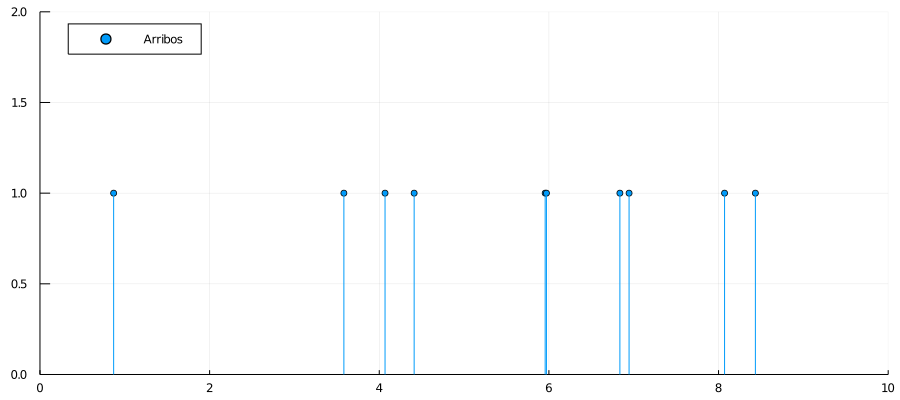

In [4]:
plot(T,ones(size(T)), lt=:stem, marker=:circle, xlim=(0,Tfinal), ylim=(0,2), label="Arribos")

## Relación con las CMTC

Debido a la construcción anterior, si consideramos el proceso:

$$N(t) = \text{no. de arribos hasta tiempo } t,$$

entonces $N(t)$ es una CMTC que arranca en $N(0)=0$ y con diagrama de transiciones:

![Proceso Poisson](images/ppoisson.png)

o equivalentemente con:

$$Q = \begin{pmatrix} -\lambda & \lambda & 0 & 0 &\cdots \\ 0 & -\lambda & \lambda & 0 & \cdots \\ 0 & 0 & -\lambda & \lambda & \cdots \\ \ddots& \ddots &\ddots & \ddots & \cdots \end{pmatrix}.$$

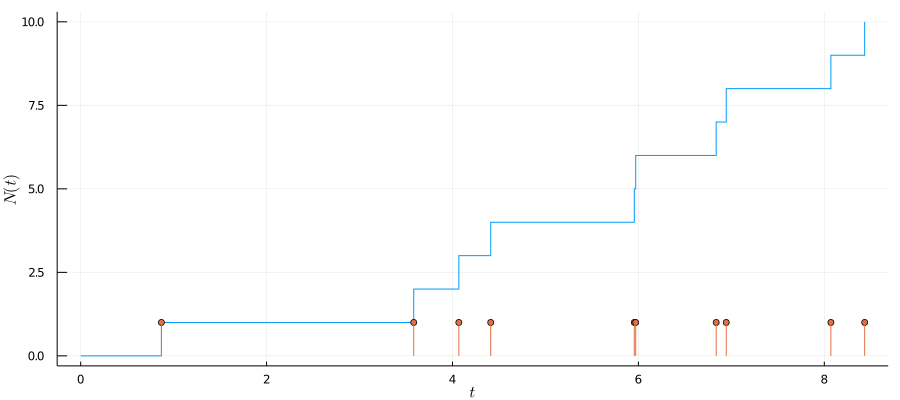

In [5]:
#Construyo el vector de arribos. Agrego un 0 para graficar el primer escalon

N=collect(0:length(T))

plot([0;T],N,lt=:steppost, legend=:none, xlabel=L"t", ylabel=L"N(t)")
plot!(T,ones(size(T)), lt=:stem, marker=:circle)

**Nota:** ambas representaciones, $\{T_n\}$ o $N(t)$ son equivalentes.

## Distribución del conteo de arribos

La definición anterior nos dice *cuándo* ocurren los arribos. Nos preguntamos ahora *cuántos* arribos hay en un intervalo dado.

Es decir, queremos calcular:

$$P(N(t)=k), \quad k=0,1,\ldots, \quad t\geqslant 0.$$

Observemos que lo anterior es la probabilidad de ir de $0$ a $k$ en tiempo $t$ de la cadena, por lo que puede resolverse con una ecuación diferencial lineal. Se cumple que:

> **Teorema:** Si $\{T_n\}$ o $N(t)$ es un Proceso de Poisson de intensidad $\lambda$, entonces la distribución de la variable aleatoria $N(t)=$ cant. de arribos hasta tiempo $t$ verifica:
>
> $$P(N(t)=k) = e^{-\lambda t} \frac{(\lambda t)^k}{k!}, \quad k=0,1,2,\ldots,$$
>
> es decir $N(t)\sim Poisson(\lambda t)$

En particular, $E[N(t)] = \lambda t$


### Ejemplo, conteo hasta tiempo $t$:

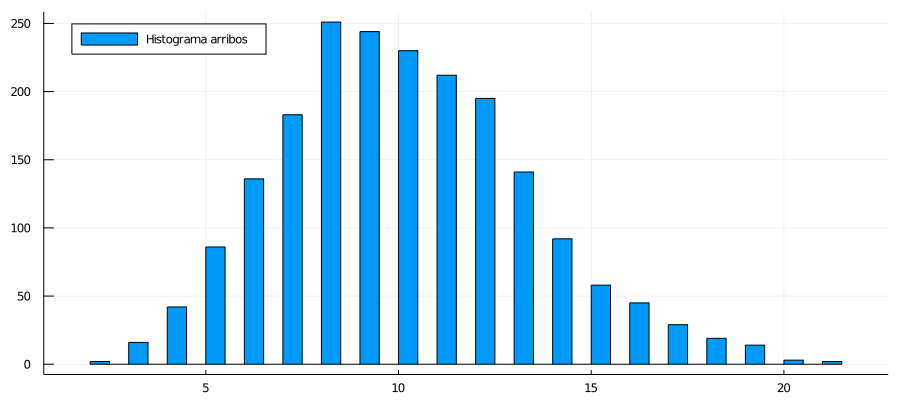

In [6]:
using StatsBase

lambda=1.0
Tfinal=10.0

#Repito múltiples procesos de Poisson hasta tiempo fijo y guardo cuantos arribos hubo en total 
n=2000
N=zeros(n);

for i=1:n
    Tn = simula_poisson(lambda,Tfinal)
    N[i]=length(Tn)
end

hist=fit(Histogram, N, nbins=50)
plot(hist, label="Histograma arribos")

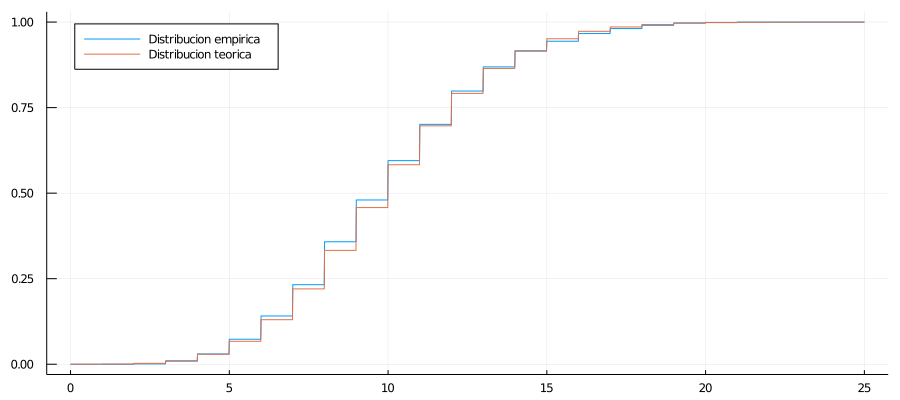

In [7]:
#Calculo la distribucion empírica
ecdfN = ecdf(N)

##Distribucion teorica
dist = Poisson(lambda*Tfinal)

t=(0:0.01:25)
plot(t,ecdfN.(t),label="Distribucion empirica")

#Con esta linea agregamos una grafica a la ya existente
plot!(t,cdf.(dist,t),label="Distribucion teorica")

### Ejemplo: varias trayectorias y $E[N(t)]$.

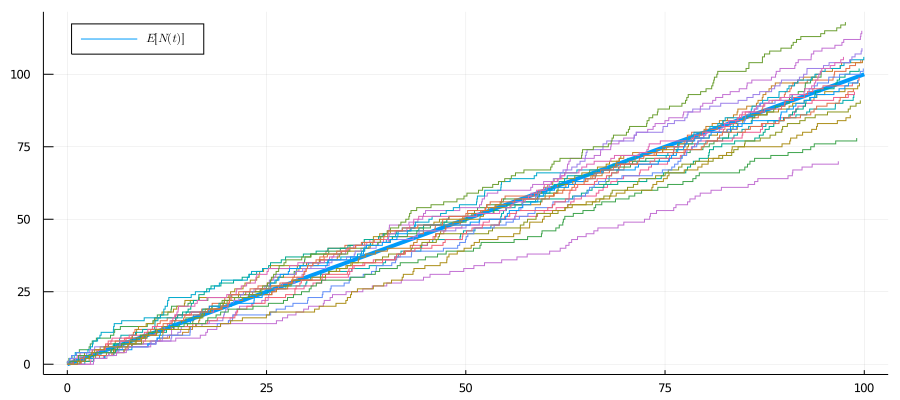

In [8]:
n=20
Tfinal=100.0

#grafico la esperanza
p=plot((0:Tfinal),lambda*(0:Tfinal), label=L"E[N(t)]", lw=4)

#grafico n trayectorias
for i=1:n
    Tn = simula_poisson(lambda,Tfinal)
    plot!(p,[0;Tn],[0:length(Tn)], lt=:steppost, label=nothing)
end

p

### Arribos en un intervalo arbitrario

Definamos:

$$N((s,t]) = \text{no. arribos en }(s,t] = N(t) - N(s).$$

**Proposición:** Como al llegar a tiempo $s$, el proceso "comienza nuevamente" desde $N(s)$, el estado al que llegó, la cantidad de arribos entre $s$ y $t$ debe verificar:

$$N((s,t]) \sim Poisson(\lambda(t-s)),$$

para cualquier intervalo $(s,t]$ finito. En particular $E[N((s,t])] = \lambda(t-s)$.

Observemos que si $s=0$ recuperamos el valor anterior.


### Independencia de intervalos disjuntos

Consideremos dos intervalos $(s_1,t_1]$ y $(s_2,t_2]$ que no se solapan (disjuntos). Entonces, como el proceso "pierde la memoria" al llegar al segundo intervalo, se tiene que:

**Proposición:** $N((s_1,t_1])$ y $N((s_2.t_2])$ son variables aleatorias independientes para cualquier par de intervalos disjuntos.

La propiedad anterior vale también para cualquier conjunto de intervalos. Se dice que $N(t)$ tiene *incrementos indepdendientes*.

**Interpretación:** esto refleja lo de "chance pura", lo que pase en un momento del tiempo no determina lo que pase en ningún otro.

**Propiedad:** el P. Poisson es el único proceso de arribos que cumple esto.

## Superposición de procesos de Poisson

Supongamos que tenemos dos procesos de Poisson $N_1(t)$ y $N_2(t)$ independientes, de tasas $\lambda_1$ y $\lambda_2$.

**Proposición:** El proceso $N(t) = N_1(t) + N_2(t)$ que combina los arribos de ambos procesos es también un proceso de Poisson de intensidad $\lambda = \lambda_1+\lambda_2$

**Idea:** si los eventos son completamente al azar e independientes, entonces la superposición produce otro proceso de Poisson.

Matemáticamente, la idea que está atrás es que el mínimo de dos exponenciales es exponencial.

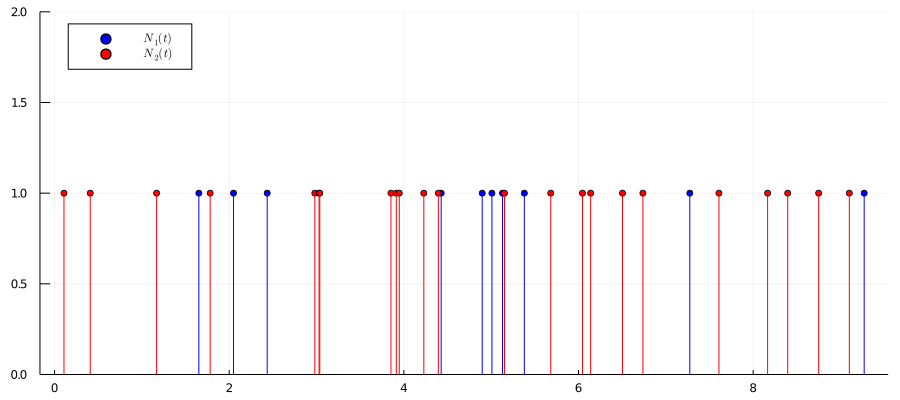

In [9]:
lambda1 = 1.0
lambda2 = 2.0
Tfinal=10

T1 = simula_poisson(lambda1,Tfinal)
T2 = simula_poisson(lambda2,Tfinal)

plot(T1,ones(size(T1)), color=:blue, lt=:stem, marker=:circle, ylim=(0,2), label=L"N_1(t)")
plot!(T2,ones(size(T2)), color=:red, lt=:stem, marker=:circle, ylim=(0,2), label=L"N_2(t)")

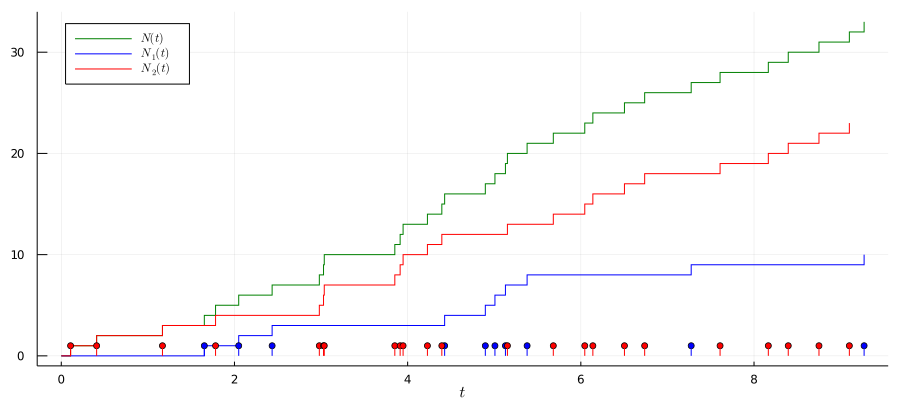

In [10]:
T = sort([T1;T2])

plot([0;T],0:length(T),lt=:steppost, label=L"N(t)", xlabel=L"t", color=:green)
plot!([0;T1],0:length(T1),lt=:steppost, label=L"N_1(t)", xlabel=L"t", color=:blue)
plot!([0;T2],0:length(T2),lt=:steppost, label=L"N_2(t)", xlabel=L"t", color=:red)


plot!(T1,ones(size(T1)), lt=:stem, marker=:circle, color=:blue, label=:none)
plot!(T2,ones(size(T2)), lt=:stem, marker=:circle, color=:red, label=:none)


## Refinamiento de procesos de Poisson

Supongamos que tenemos un proceso de Poisson $N(t)$. Consideremos la siguiente construcción:

   * Para cada punto del proceso, se sortea una moneda que tiene probabilidad $p$ de salir cara, independiente.
   * Si la moneda cae cara, se retiene el punto, si no se borra. 

**Proposición:** El proceso $N_p(t)$ así obtenido es un nuevo proceso de Poisson de intensidad $\lambda p$.

**Idea:** si solo nos quedamos con eventos que cumplen una cierta propiedad (con probabilidad $p$) el resultado es un proceso de Poisson "más espaciado".


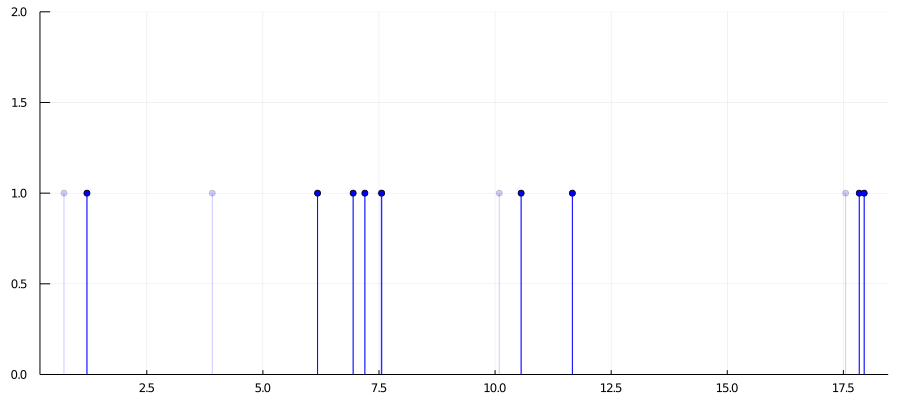

In [11]:
lambda1 = 1.0
p = 0.5
Tfinal=20

T = simula_poisson(lambda, Tfinal)

d=Bernoulli(p)

Tp=Float64[];

for i=1:length(T)
    aux = rand(d)
    if(aux==1)
        push!(Tp,T[i])
    end
end

plot(T,ones(size(T)), lt=:stem, marker=:circle, color=:blue, alpha=0.2, label=:none, ylim=(0,2))
plot!(Tp,ones(size(Tp)), lt=:stem, marker=:circle, color=:blue, label=:none)

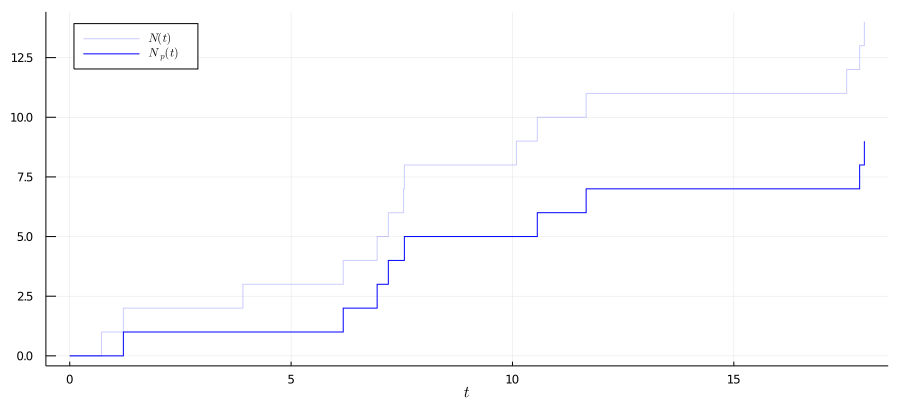

In [12]:
plot([0;T],0:length(T),lt=:steppost, label=L"N(t)", xlabel=L"t", color=:blue, alpha=0.2)
plot!([0;Tp],0:length(Tp),lt=:steppost, label=L"N_p(t)", xlabel=L"t", color=:blue)

## Ruteo aleatorio de procesos de Poisson (splitting)

Supongamos que tenemos un proceso de Poisson $N(t)$. Consideremos la siguiente construcción análoga a la anterior:

   * Para cada punto del proceso, se sortea una moneda que tiene probabilidad $p$ de salir cara, independiente.
   * Si la moneda cae cara, se agrega el punto al proceso $N_1(t)$, Si cae cruz, se agrega al proceso $N_2(t)$.

**Proposición:** Los dos procesos $N_1(t)$ y $N_2(t)$ así obtenidos son procesos de Poisson *independientes* de intensidad $\lambda p$ y $\lambda(1-p)$.

**Idea:** el que cada uno de ellos es Poisson es la propiedad anterior. Lo nuevo es que se comportan como si fueran fuentes independientes (solo sabemos que dependen entre sí si nos dan el proceso $N(t)$ original).

**Aplicación:** Si "ruteamos" tráfico de manera probabilística, podemos tratarlos como fuentes independientes.

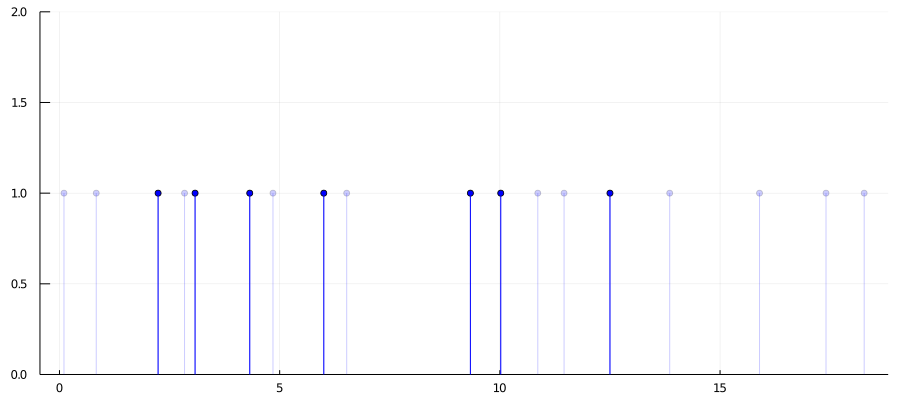

In [13]:
lambda1 = 1.0
p = 0.5
Tfinal=20

T = simula_poisson(lambda, Tfinal)
d=Bernoulli(p)

T1=Float64[];
T2=Float64[];

for i=1:length(T)
    aux = rand(d)
    if(aux==1)
        push!(T1,T[i])
    else
        push!(T2,T[i])
    end
end

plot(T,ones(size(T)), lt=:stem, marker=:circle, color=:blue, alpha=0.2, label=:none, ylim=(0,2))
plot!(T1,ones(size(T1)), lt=:stem, marker=:circle, color=:blue, label=:none)

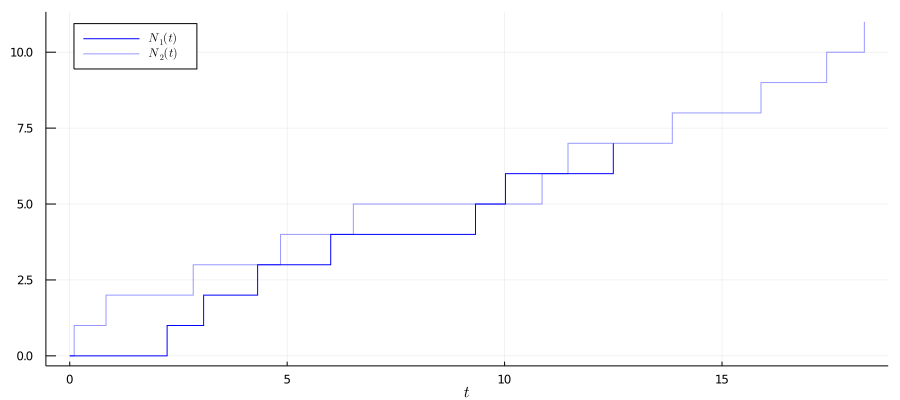

In [14]:
plot([0;T1],0:length(T1),lt=:steppost, label=L"N_1(t)", xlabel=L"t", color=:blue)
plot!([0;T2],0:length(T2),lt=:steppost, label=L"N_2(t)", xlabel=L"t", color=:blue, alpha=0.4)


## Propiedad PASTA
### Poisson Arrival See Time Averages


Consideremos un sistema al que llegan "trabajos" para atender. Sea $X(t)$ el estado del sistema, y supongamos que llega a régimen. Podemos calcular:


* La proporción de tiempo que el sistema se encuentra en el estado $k$. Esta debe ser $\pi_k = P(X(t)=k)$ en régimen.

* La proporción de veces que un arribo nuevo encuentra al sistema en estado $k$ justo antes de llegar. Matemáticamente, $\tilde{\pi}_k = P(X(T_n^-) = k)$. Observemos que esto es un promedio *solo en los tiempos de arribo*.

**Proposición:** si el proceso de arribos es Poisson, entonces $\pi_k = \tilde{\pi}_k$, es decir, los arribos Poisson "ven" el sistema al llegar igual que si estuviera en régimen.

### Representación

![sistema](images/sistema.png)

### Ejemplo (de no-PASTA)

Consideremos un sistema al cual:

 * Llegan clientes cada *exactamente* $T=1$ min. (arribos determinísticos).
 * El tiempo de servicio de cada cliente es $45$ seg. (también determinístico, aunque no es crucial)
 
Entonces:

 * La proporción de tiempo que el sistema pasa ocupado en régimen es $P(X(t)=1)= 45/60 = 0.75$.
 * La proporción de veces que un arribo ve el sistema ocupado es $P(X(nT^-) = 1) = 0$, ya que el cliente anterior ya se fue con probabilidad $1$.
 
Es decir, en este caso no coinciden. Como el proceso de arribos no es completamente aleatorio, la llegada de un cliente me da información de hace cuánto llegó el anterior, y puedo deducir de allí que ya terminó su servicio.

El Proceso de Poisson, al ser completamente aleatorio, "limpia" esto y ve el sistema en régimen.